In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [13]:
(X_train,Y_train),(X_test,Y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [15]:
len(X_train)

60000

In [17]:
len(X_test)

10000

In [19]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [21]:
X_train[0].shape

(28, 28)

In [29]:
plt.matshow(X_train[2])

In [33]:
Y_train[2]

4

## Going to flatten our data set

In [62]:
X_trainFlatten =X_train.reshape(-1, 28*28) / 255.0

In [64]:
X_testFlatten = X_test.reshape(-1, 28*28) / 255.0

In [66]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_trainFlatten, Y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8222 - loss: 0.7127
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9126 - loss: 0.3127
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9187 - loss: 0.2906
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9229 - loss: 0.2750
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9263 - loss: 0.2611


In [70]:
model.evaluate(X_testFlatten, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9146 - loss: 0.3023


[0.2675545811653137, 0.9251999855041504]

In [122]:
y_predicted = model.predict(X_testFlatten)
y_predicted[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([4.9031565e-01, 8.3169611e-03, 9.9958611e-01, 3.6838284e-01,
       8.1747337e-10, 9.0079427e-01, 9.4655150e-01, 1.1690357e-12,
       1.5207487e-01, 1.9097020e-09], dtype=float32)

In [98]:
plt.matshow(X_test[0])

In [102]:
model.predict(X_testFlatten[:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


array([[1.49859395e-02, 2.47012395e-07, 4.79380861e-02, 9.59246039e-01,
        2.39345990e-03, 1.23000257e-01, 1.37579809e-06, 9.99817967e-01,
        8.29401985e-02, 6.09653115e-01]], dtype=float32)

In [104]:
np.argmax(y_predicted[0])

7

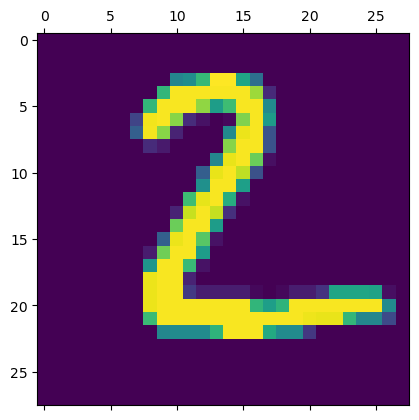

In [116]:
plt.matshow(X_test[1])
plt.show()

In [124]:
np.argmax(y_predicted[1])

2

In [128]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [130]:

y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [134]:
cm = tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    2,    2,    0,    5,    8,    3,    2,    0],
       [   0, 1113,    3,    2,    0,    2,    4,    2,    9,    0],
       [   5,    9,  923,   14,   10,    6,   13,   12,   38,    2],
       [   3,    0,   21,  914,    0,   30,    3,   12,   22,    5],
       [   1,    1,    2,    1,  923,    0,   14,    5,   11,   24],
       [  10,    2,    3,   25,   12,  782,   19,    6,   28,    5],
       [   6,    3,    5,    1,    7,   11,  922,    2,    1,    0],
       [   1,    5,   22,    7,    6,    0,    0,  964,    3,   20],
       [   6,   10,    6,   25,    9,   29,    9,   14,  861,    5],
       [  10,    7,    1,   11,   34,    8,    0,   36,   10,  892]])>

In [136]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(95.72222222222221, 0.5, 'Truth')

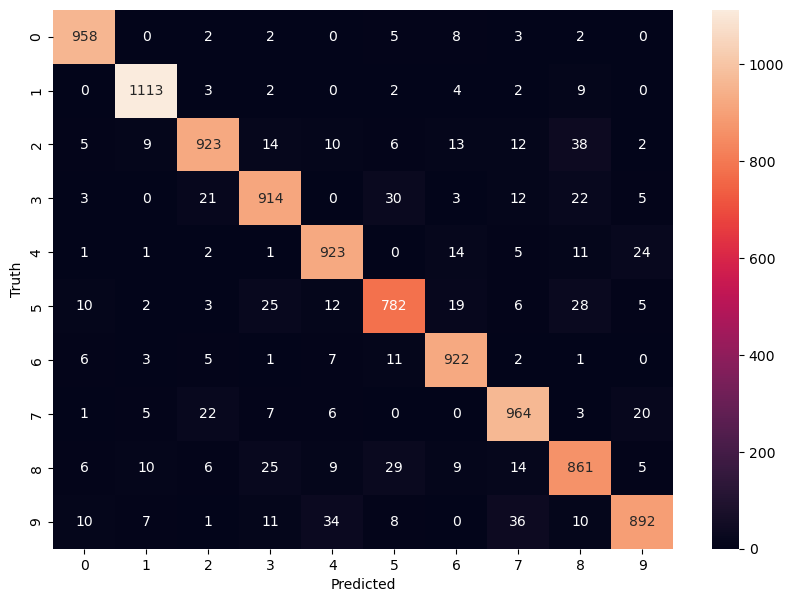

In [138]:
plt.show()

In [140]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_trainFlatten, Y_train, epochs=5)

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.8716 - loss: 0.4567
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.9621 - loss: 0.1277
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9744 - loss: 0.0871
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9816 - loss: 0.0619
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9843 - loss: 0.0508


In [144]:
model.evaluate(X_testFlatten,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9710 - loss: 0.0965


[0.08374732732772827, 0.9751999974250793]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


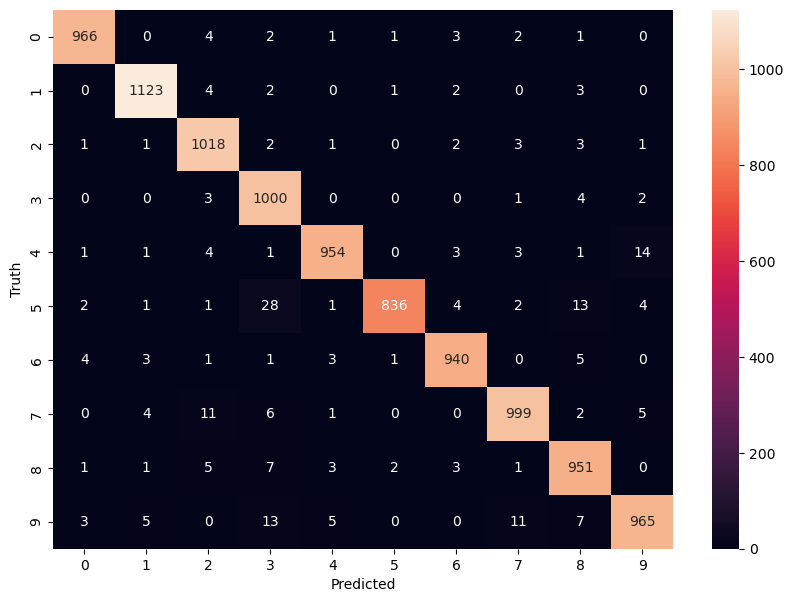

In [148]:
y_predicted = model.predict(X_testFlatten)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [154]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.4890 - loss: 8.2455
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6631 - loss: 0.4367
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.5897 - loss: 0.2937
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.4692 - loss: 0.2564
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.4115 - loss: 0.2502
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.3647 - loss: 0.2184
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.3644 - loss: 0.2052
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.3702 - loss: 0.2010
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.3647 - loss: 0.1919
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.3643 - loss: 0.1880


In [158]:
model.evaluate(X_test,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3700 - loss: 0.3507


[0.30011579394340515, 0.3547999858856201]